# TWITTER SENTIMENT CLASSIFICATION PROJECT

## 1.1 Introduction

In today's rapidly changing world, climate change has emerged as one of the most pressing global challenges. The need to mitigate its effects and promote sustainable practices has become paramount. Consequently, many companies are striving to align their products and services with environmentally friendly and sustainable principles.

At the forefront of this movement, TEAM ZEITGEIST has taken the initiative of developing a cutting-edge Machine Learning model that can accurately classify individuals' beliefs regarding climate change based on their novel tweet data. 
___


## 1.2 Project Aim

The primary objective of our project is to build a robust Machine Learning model capable of classifying individuals' beliefs on climate change based on their tweets. By harnessing the power of NLP and classification algorithms, we seek to
- Provide companies with valuable insights into public sentiments regarding climate change, aiding their market research efforts.
- Enable businesses to understand consumer perceptions of climate change across diverse demographic and geographic categories.
- Inform future marketing strategies by bridging the gap between environmental awareness and commercial viability.
___

## 1.3 Project Team

Meet our dynamic team of data and innovation enthusiasts, working together to drive positive impact through advanced data analysis and machine learning:
- Karabo Lamola
- Mukhtar Abebefe
- Sandile Mdluli
- Chidinma Madukife
- Greensmill Akpa
- Obinna Ekesi
- Obot Joshua

___
___

# 2.0 Data Description

The data used for this project was scrapped from tweeter. It contains, 3 rows (TweetID, Messages, Sentiments).

The sentiments are categorized into 4 and each tweet is labelled as one of the 4 categories/classes described below.

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

We will go ahead and load the data, but before we do that, we will be importing the required libraries.


## 2.1 Import the necessary Libraries

In [1]:
import numpy as np                                          #For statistics, array creation and manipulation
import pandas as pd                                         #For data loading and data manipulation
import seaborn as sns                                       #For data visualization
from wordcloud import WordCloud                             #For visualizing the summarized textual data
import matplotlib.pyplot as plt                             #For data visualization - %matplotlib below is a magic command to render matplotlib in jupyter
%matplotlib inline                                           

import nltk                                                 #For natural language processing
from nltk.corpus import stopwords                           #For stopwords processing
from nltk.tokenize import TreebankWordTokenizer             #For splitting sentences into words
from nltk import SnowballStemmer, PorterStemmer             #For reducing words to its base form
from sklearn.feature_extraction.text import CountVectorizer #For mapping/converting words into real numbers
from sklearn.model_selection import train_test_split        #For splitting the dataset into train and test
from sklearn.preprocessing import MaxAbsScaler              #For scaling our data
from sklearn.svm import SVC                                 #For building a support vector classifier model
from sklearn.ensemble import RandomForestClassifier         #For building a random forest model
from sklearn.linear_model import LogisticRegression         #For building a logistic regression model
from sklearn.naive_bayes import MultinomialNB               #For building a Naive Bayes model


from sklearn.metrics import classification_report, f1_score, accuracy_score #For evaluating model preformance

import re                                  #For data cleaning to remove/replace unwanted patterns
import pickle

## 2.2 Loading the Data

In [2]:
df_train = pd.read_csv("train.csv") #Training data
df_test = pd.read_csv('test_with_no_labels.csv') #Test data

In [3]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


We can already identify a few problems with our data just by looking at the first few rows such as items that do not necessarily add value to the meaning of the tweets ie: punctuations, stopwords, Twitter handles, urls, etc.

Let's analyse the data further before dealing these.
___
___

# 3.0 Exploratory Data Analysis

In order to gain a comprehensive understanding of our dataset and unearth valuable insights, we embark on an exploratory journey through the realm of data. 

Through Exploratory Data Analysis (EDA), we delve into the intricacies of our dataset, unraveling patterns, relationships, and trends hidden within. 

We also employ a range of statistical and visual techniques, that will help shed light on the characteristics, distribution, and key features of our data.

In [4]:
#Making a copy of our training data
df = df_train.copy() 

In [5]:
#View the number of rows and columns in our data
df.shape 

(15819, 3)

In [6]:
#Display the column names
df.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [7]:
#Display the column names of the test data
df_test.columns

Index(['message', 'tweetid'], dtype='object')

The sentiment column is missing in the test data because that is the target feature we'll be making predictions on.

In [10]:
#Lets get some more details on our data ie null values, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
#Cheking for duplicates
df.duplicated().sum()

0

Our data has no null values and no duplicates. Datatypes are of object and int type.

Now, let us proceed by visualize the distribtion of the sentiments.

### Visualizing Sentiment Distribution

To further understand the data, and check for imbalance we will
- Plot a bar plot to display the distribution of sentiments across the observations
- Plot a pie chat to display the percentage distribution of each sentiment

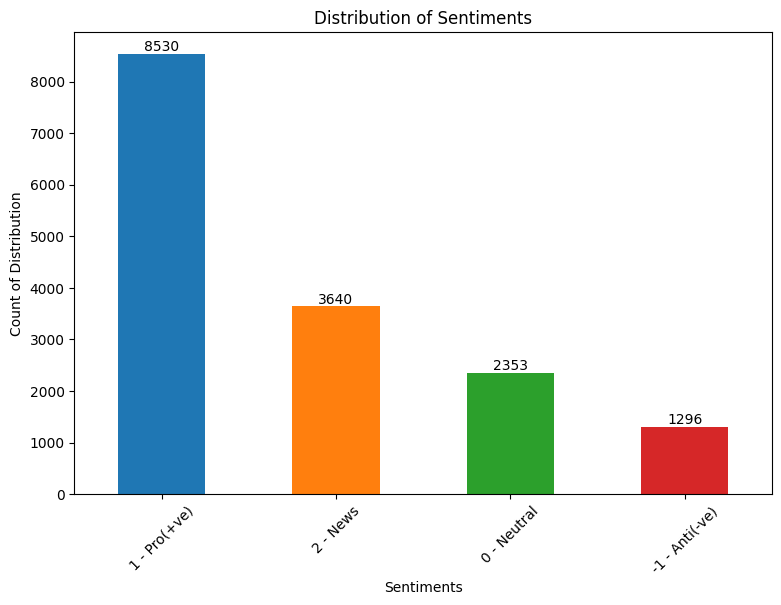

In [9]:
#Count the number of tweets per sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Set the desired colors for the bars
colors = sns.color_palette() #['black'] #, 'green', 'blue', 'orange']

# Define the custom labels and figure size
sentiment_labels = {1: '1 - Pro(+ve)', 2: '2 - News', 0: '0 - Neutral', -1: '-1 - Anti(-ve)'}
plt.figure(figsize=(9,6))

# Plot the bar plot
ax = sentiment_counts.rename(index=sentiment_labels).plot(kind='bar', color=colors)

# Add precise counts above each bar
for i, count in enumerate(sentiment_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Customize xticks and rotation of x-axis labels to improve readability
plt.xticks(range(len(sentiment_counts.index)),sentiment_counts.rename(index=sentiment_labels).index, rotation=45)

# Add labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count of Distribution')
plt.title('Distribution of Sentiments')

# Display the plot
plt.show()

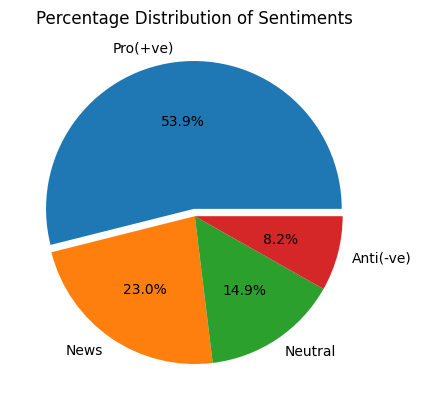

In [10]:
#Count the number of tweets per sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Calculate the percentage distribution
percentage_dist = sentiment_counts / len(df) * 100

explode = [0.05 if i == 1 else 0 for i in percentage_dist.index] # explode the slice for positive sentiment 
sentiment_labels = {1: 'Pro(+ve)', 2: 'News', 0: 'Neutral', -1: 'Anti(-ve)'} # Define the sentiment labels

# Replace the original labels with defined labels
labels = [sentiment_labels.get(label, str(label)) for label in percentage_dist.index] 
colors =  sns.color_palette() # Use Seaborn's color palette 'Set2' to customize the colors for each slice

# Plot the pie chart with exploded slice, custom labels, and custom colors
plt.pie(percentage_dist, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors) 
plt.title('Percentage Distribution of Sentiments') # Set the title
plt.show() # Display the chart

We observe some imbalance in this distribution of sentiments across the observation with 53.9% of the distribution attributed to the pro(positive) sentiment. Dealing with this imbalance shall become an absolute necessity if we observe negative impacts in the model's performance on the minority class.

Let's proceed with processing/cleaning of our data. We’ll apply the following steps one by one:
- transform tweet text into lowercase
- remove stopwords
- remove Twitter handles or mentions
- remove hyperlinks/urls
- remove hashtags
- remove punctuations and non-alphanumeric characters like repeated punctuations
- remove whitespace
- remove rt

## 3.1 Data Cleaning

In [7]:
#Display some rows in our data before cleaning

print(df['message'].iloc[2])
print(df['message'].iloc[3])
print(df['message'].iloc[9])

RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………


In [11]:
def clean_message(text):
    
    text = text.lower() # Convert to lowercase

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove Twitter handles or mentions
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r'([^\s\w“”]|_)+', '', text) # Remove non-alphanumeric characters such as repeated punctuation marks
    text = ' '.join(text.split()) # Remove whitespace
    text = text.replace('rt', '')  # Remove 'rt'

    return text.strip()

df['clean_message'] = df['message'].apply(clean_message)
df['clean_message'].iloc[2]

'researchers say three years act climate change its late'

In [12]:
df.head()

,sentiment,message,tweetid,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say three years act climate change...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wired 2016 pivotal year war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,2016 racist sexist climate change denying bigo...


In [13]:
df.tail()

,sentiment,message,tweetid,clean_message
15814,1,RT @ezlusztig: They took down the material on ...,22001,took material global warming lgbt rights healt...
15815,2,RT @washingtonpost: How climate change could b...,17856,climate change could breaking 200millionyearol...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,notiven nytimesworld what trump actually beli...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,hey liberals climate change crap hoax ties cli...
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319,s climate change equation 4 screenshots


Now, we have a dataset void of any form of noise. Let's move to the next step

## 3.2 Tokenization and Stemming

To further prepare our data for analysis we will be breaking down the tweets into a sequence of smaller units known as tokens. These tokens will then be normalized in a process know as stemming which involves reducing wors to their base so that variations of the same word are treated as the same token during text analysis.

In [14]:
#Tokenizing the clean message

tokeniser = TreebankWordTokenizer()
df['tokens'] = df['clean_message'].apply(tokeniser.tokenize)

In [15]:
#Stemming the clean message

stemmer = PorterStemmer()

def df_stemmer(words, stemmer):
    return ' '.join([stemmer.stem(word) for word in words])

#Apply stemming function
df['clean_message'] = df['tokens'].apply(df_stemmer, args=(stemmer, ))

In [16]:
df.head()

,sentiment,message,tweetid,clean_message,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxid mai...,"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,research say three year act climat chang it late,"[researchers, say, three, years, act, climate,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wire 2016 pivot year war climat chang,"[wired, 2016, pivotal, year, war, climate, cha..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,2016 racist sexist climat chang deni bigot lea...,"[2016, racist, sexist, climate, change, denyin..."


In [17]:
#Dropping columns that are not required

df = df.drop(['message', 'tokens'], axis = 1)

In [18]:
df.head()

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief think carbon dioxid mai...
1,1,126103,like lack evid anthropogen global warm
2,2,698562,research say three year act climat chang it late
3,1,573736,wire 2016 pivot year war climat chang
4,1,466954,2016 racist sexist climat chang deni bigot lea...


In [49]:
#Save Clean training Data

df.to_csv("clean_train.csv", index=False)

## 3.3 Text Analysis

The text analysis will be carried out using wordcloud. Our goal in this section is to quickly identify the most common words within each sentiment. This will help us gain better insight into prominent terms and patterns in our data and ultimately aid the feature selection process.

In [20]:
# Word frequencies
'''
The code below splits the clean message column, returns splited word as a separate column, reshapes the dataframe, 
calculates the frequency of each word and creates a Series where the words are the index and their frequencies are the values.
'''
word_frequencies = df['clean_message'].str.split(expand=True).stack().value_counts()



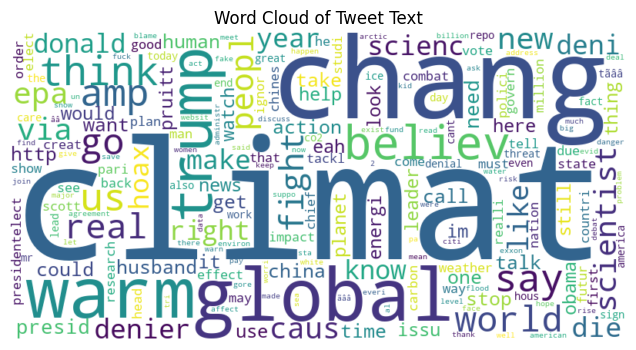

In [21]:
# Generate word cloud for the whole data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot word cloud
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()

From the word cloud we can quickly identify some of the most frequently used words eg climat, chang, warm etc. Lets visualize these common words for the positive and negative sentiments respectively.

In [22]:
# Convert word frequencies to a DataFrame
word_frequencies_df = pd.DataFrame({'Word': word_frequencies.index, 'Frequency': word_frequencies.values})

# Display the word frequencies in a tabular form
word_frequencies_df.head()

,Word,Frequency
0,climat,12605
1,chang,12584
2,global,3789
3,warm,3556
4,trump,2289


### Wordcloud for Positive Sentiments

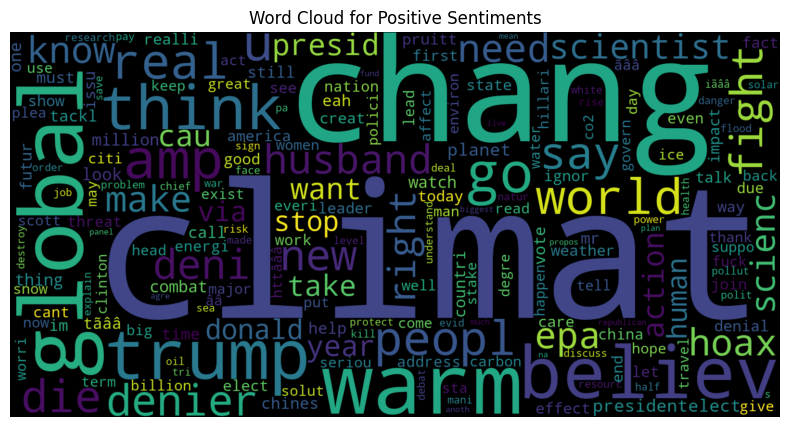

In [23]:
# Filter the DataFrame for positive sentiments 
positive_sentiments = df[df['sentiment'] == 1]

# Concatenate the text from filtered rows into a single string
text_positive_sentiments = ' '.join(positive_sentiments['clean_message'])

# Create a word cloud object
wordcloud = WordCloud(max_words = 200, width = 1600 , height = 800, collocations=False).generate(text_positive_sentiments)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

### Wordcloud for  Negative Sentiments

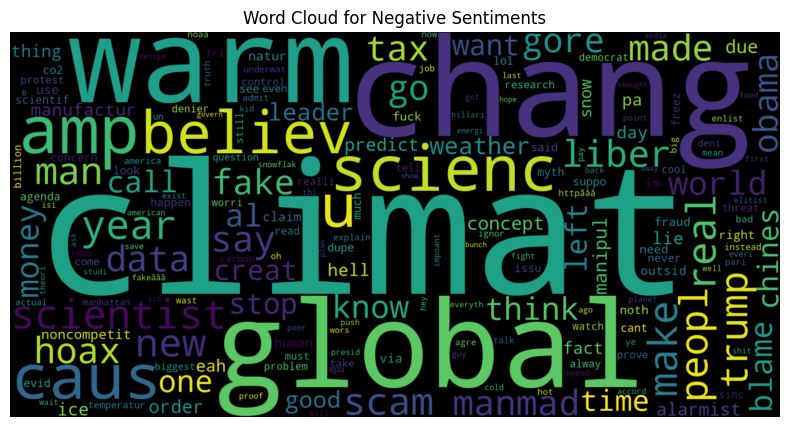

In [24]:
# Filter the DataFrame for positive sentiments (assuming 'sentiment' column contains sentiment labels)
negative_sentiments = df[df['sentiment'] == -1]

# Concatenate the text from filtered rows into a single string
text_negative_sentiments = ' '.join(negative_sentiments['clean_message'])
# Generate the word cloud
wordcloud = WordCloud(max_words = 200, width = 1600 , height = 800, collocations=False).generate(text_negative_sentiments)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

### Plot Top Frequent Words

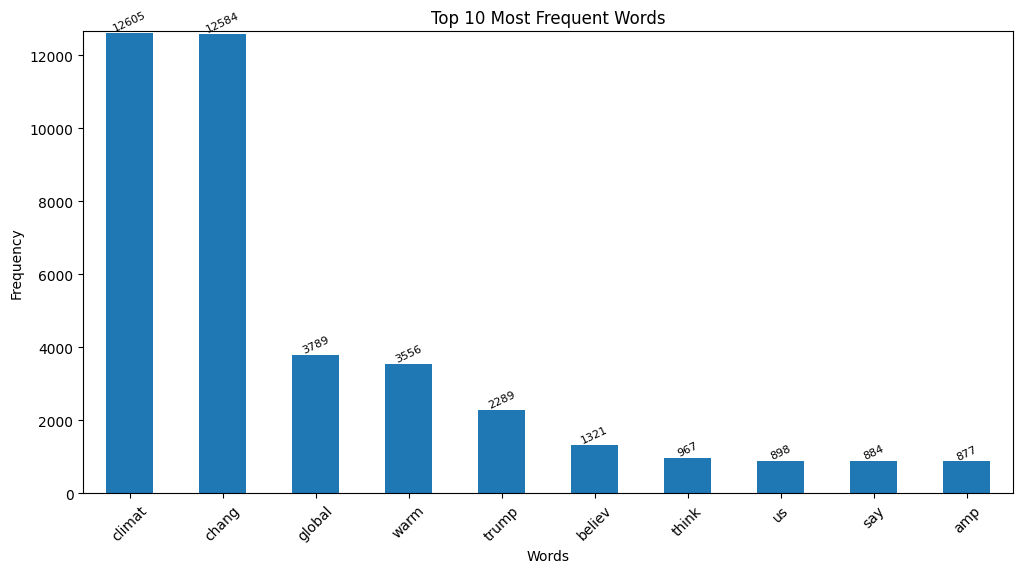

In [25]:
# Plot top frequent words

# Set the figure size of the plot
plt.figure(figsize=(12, 6)) 

# Specify the number of top words to display
top_n = 10

# Select the top 'n' words based on their frequencies and plot a bar chart
word_frequencies_top_n = word_frequencies.head(top_n) 
word_frequencies_top_n.plot(kind='bar') 

# Set the x and y-axis labels, plot title and rotation of the x-axis label
plt.xlabel('Words') 
plt.ylabel('Frequency') 
plt.title(f'Top {top_n} Most Frequent Words') 
plt.xticks(rotation=45)  

# Loop through and add precise counts above each bar
for i, v in enumerate(word_frequencies_top_n):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, rotation=25)
    
# Adjust the y-axis limits to provide additional space for the text
plt.ylim(0, max(word_frequencies_top_n) + 50)
    
plt.show()

### Text Frequency Distribution for Each Sentiment

In [28]:
# Create separate DataFrames for each sentiment value
sentiment_minus1 = df[df['sentiment'] == -1].copy()
sentiment_zero = df[df['sentiment'] == 0].copy()
sentiment_one = df[df['sentiment'] == 1].copy()
sentiment_two = df[df['sentiment'] == 2].copy()

print("Sentiment -1 DataFrame:")
display(sentiment_minus1.head())

# print("Sentiment 0 DataFrame:")
# display(sentiment_zero.head())

# print("Sentiment 1 DataFrame:")
# display(sentiment_one.head())

# print("Sentiment 2 DataFrame:")
# display(sentiment_two.head())

Sentiment -1 DataFrame:


,sentiment,tweetid,clean_message
28,-1,355491,salli kohn latest evid climat chang prove not ...
46,-1,61141,carbon tax globalist idea enslav world popul w...
48,-1,719523,wind close 100 mph area afternoon would blame ...
56,-1,911385,lmao snowflak complain snowflak winter global ...
57,-1,768263,one arnold schwarzenegg vehicl whine climat ch...


In [29]:
# Word frequencies for each sentiment dataframe
word_frequencies_m1 = sentiment_minus1['clean_message'].str.split(expand=True).stack().value_counts()
word_frequencies0 = sentiment_zero['clean_message'].str.split(expand=True).stack().value_counts()
word_frequencies1 = sentiment_one['clean_message'].str.split(expand=True).stack().value_counts()
word_frequencies2 = sentiment_two['clean_message'].str.split(expand=True).stack().value_counts()


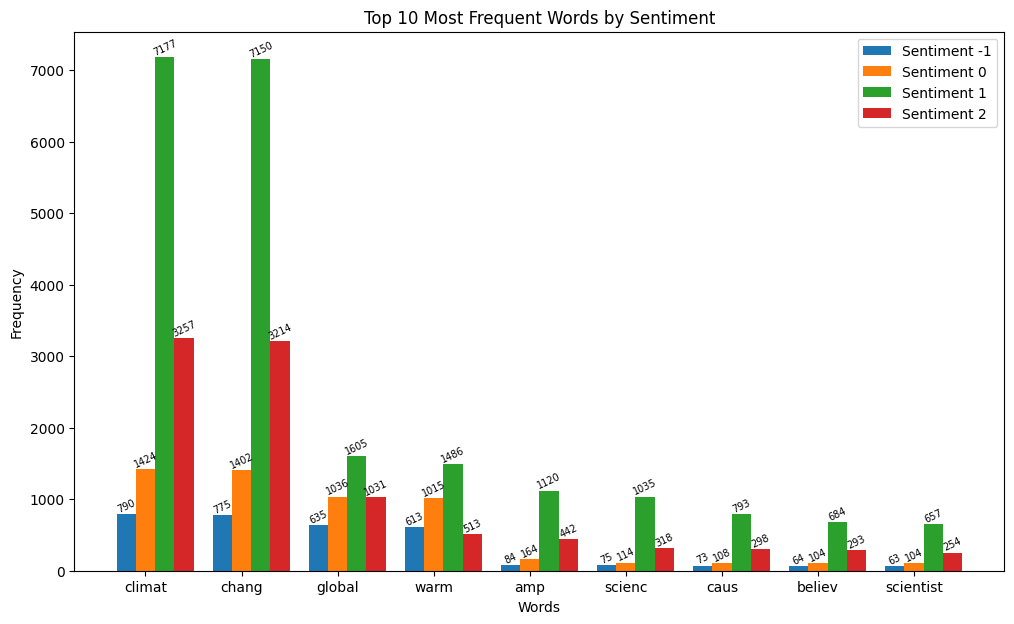

In [30]:
# Define the number of top words to display
top_n = 9

# Get the top words for each sentiment category
top_words_m1 = word_frequencies_m1.index[:top_n]
top_words0 = word_frequencies0.index[:top_n]
top_words1 = word_frequencies1.index[:top_n]
top_words2 = word_frequencies2.index[:top_n]

# Get the frequencies of the top words for each sentiment category
top_word_freq_m1 = word_frequencies_m1.values[:top_n]
top_word_freq0 = word_frequencies0.values[:top_n]
top_word_freq1 = word_frequencies1.values[:top_n]
top_word_freq2 = word_frequencies2.values[:top_n]

# Create a list of all top words
all_top_words = list(set(top_words_m1) | set(top_words0) | set(top_words1) | set(top_words2))

# Initialize the arrays to store the word frequencies for each sentiment category
word_freq_m1 = np.zeros(len(all_top_words))
word_freq0 = np.zeros(len(all_top_words))
word_freq1 = np.zeros(len(all_top_words))
word_freq2 = np.zeros(len(all_top_words))

# Populate the stacked word frequencies arrays
for i, word in enumerate(all_top_words):
    if word in top_words_m1:
        word_freq_m1[i] = top_word_freq_m1[np.where(top_words_m1 == word)][0]
    if word in top_words0:
        word_freq0[i] = top_word_freq0[np.where(top_words0 == word)][0]
    if word in top_words1:
        word_freq1[i] = top_word_freq1[np.where(top_words1 == word)][0]
    if word in top_words2:
        word_freq2[i] = top_word_freq2[np.where(top_words2 == word)][0]


# Plot the grouped bar plot
plt.figure(figsize=(12,7))
bar_width = 0.2  # Width of each bar

# Set the x-axis positions for each group of bars
x_positions = np.arange(top_n)

# Plot the bars for each sentiment category
plt.bar(x_positions - bar_width, top_word_freq_m1, width=bar_width, label='Sentiment -1')
plt.bar(x_positions, top_word_freq0, width=bar_width, label='Sentiment 0')
plt.bar(x_positions + bar_width, top_word_freq1, width=bar_width, label='Sentiment 1')
plt.bar(x_positions + 2 * bar_width, top_word_freq2, width=bar_width, label='Sentiment 2')

plt.title('Top 10 Most Frequent Words by Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(x_positions, top_words_m1)  # Use the words from the 'Sentiment -1' category as x-axis labels
plt.legend()

# Add precise labels above each bar
fontsize = 7  # Specify the desired font size
for i, freq in enumerate(top_word_freq_m1):
    plt.annotate(str(freq), xy=(x_positions[i] - bar_width, freq), ha='center', va='bottom', fontsize=fontsize, rotation=25)
for i, freq in enumerate(top_word_freq0):
    plt.annotate(str(freq), xy=(x_positions[i], freq), ha='center', va='bottom', fontsize=fontsize, rotation=25)
for i, freq in enumerate(top_word_freq1):
    plt.annotate(str(freq), xy=(x_positions[i] + bar_width, freq), ha='center', va='bottom', fontsize=fontsize, rotation=25)
for i, freq in enumerate(top_word_freq2):
    plt.annotate(str(freq), xy=(x_positions[i] + 2 * bar_width, freq), ha='center', va='bottom', fontsize=fontsize, rotation=25)


plt.show()

**Observe how the postive sentiment(green bar) has the highest frquency for the top n words in the tweets. This could be intrepreted to mean that more people believe in climate change.**

___

## 3.4 Preparing the Test Dataset

Just as we have done with the training data, we will clean the test data set, break it down into tokens(tokenization)and reduce the text feature to its root form by stemming.

In [32]:
#Cleaning the text dataset

def clean_message(text):
    
    text = text.lower() # Convert to lowercase

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove Twitter handles or mentions
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r'([^\s\w“”]|_)+', '', text) # Remove non-alphanumeric characters such as repeated punctuation marks
    text = ' '.join(text.split()) # Remove whitespace
    text = text.replace('rt', '')  # Remove 'rt'

    return text.strip()

df_test['clean_message'] = df_test['message'].apply(clean_message)
df_test['clean_message'].iloc[2]

'scary unimpeachable evidence climate change already here'

In [33]:
#Tokenizing and Stemmng Test Data
tokeniser = TreebankWordTokenizer()  #initializing tokenizer
df_test['tokens'] = df_test['clean_message'].apply(tokeniser.tokenize)

#Stemming
stemmer = SnowballStemmer('english') #initializing stemmer

def df_test_stemmer(words, stemmer):
    return ' '.join([stemmer.stem(word) for word in words])

#Apply stemming function to the test text
df_test['clean_message'] = df_test['tokens'].apply(df_test_stemmer, args=(stemmer, ))

In [34]:
#remove columns that are not required

df_test = df_test.drop(['message', 'tokens'], axis=1)
df_test.head(3)

,tweetid,clean_message
0,169760,europ look china make sure alon fight climat c...
1,35326,combin poll staffer climat chang women right f...
2,224985,scari unimpeach evid climat chang alreadi here


In [48]:
#Saving Clean Train data

df_test.to_csv('clean_test.csv', index=False)

In [117]:
#Load clean Data
df = pd.read_csv("clean_train.csv") #Training data
df_test = pd.read_csv('clean_test.csv') #Test data

___
___

# 4.0 Feature Transformation and Selection

Before we jump into the modelling process, we will transform our text data into numbers using an inbuilt library "CountVectorizer"

### Separating the Features and Label

In [51]:
X = df['clean_message']
y = df['sentiment']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Transform text data using CountVecorizer
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [58]:
X_vect.shape

(11864, 10322)

In [59]:
#Scaling our data to prevent feature domination

scaler = MaxAbsScaler() #Initialize the scaler

# Scale data
X_scaled = scaler.fit_transform(X_vect)
X_test_scaled = scaler.transform(X_test_vect)

Now that we have our data in a format that the model can understand, lets start building models.
___
___

# 5.0 Modelling

## 5.1 Logistic Regression

Logistic regression is a statistical algorithm used for binary classification tasks. It models the relationship between the input variables and the probability of belonging to a specific class. By fitting a logistic function to the data, it estimates the likelihood of an instance belonging to a particular class, making it a widely-used and interpretable classifier.

In [60]:
# Initialize the logistic regression classifier
lr = LogisticRegression(max_iter=1000)

#Train the classifier
lr.fit(X_scaled, y_train)

#Make Predictions on the testing data
y_pred = lr.predict(X_test_scaled)

In [68]:
#Evaluate model performance
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Linear regression Accuracy:", accuracy)
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['0: Neutral', '1: ProClimate','2: News','-1:AntiClimate']))

Linear regression Accuracy: 0.6915297092288243
Classification Report
                precision    recall  f1-score   support

    0: Neutral       0.68      0.36      0.47       336
 1: ProClimate       0.51      0.41      0.45       547
       2: News       0.74      0.84      0.79      2178
-1:AntiClimate       0.73      0.71      0.72       894

      accuracy                           0.71      3955
     macro avg       0.67      0.58      0.61      3955
  weighted avg       0.70      0.71      0.70      3955



## 5.2 Random Forest Classifier

The Random Forest classifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each tree in the forest independently classifies the input, and the final prediction is determined by aggregating the votes from all the trees. It excels in handling complex relationships and capturing important feature interactions, making it robust and versatile.

In [62]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_classifier.fit(X_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", 
      classification_report(y_test, y_pred, target_names=['Neutral(0)', 'ProClimate(1)','News(2)','AntiClimate(-1)']))

Random Forest Accuracy: 0.7051833122629583


Classification Report:

                  precision    recall  f1-score   support

     Neutral(0)       0.75      0.30      0.43       336
  ProClimate(1)       0.52      0.41      0.46       547
        News(2)       0.74      0.84      0.78      2178
AntiClimate(-1)       0.71      0.71      0.71       894

       accuracy                           0.71      3955
      macro avg       0.68      0.57      0.59      3955
   weighted avg       0.70      0.71      0.69      3955



## 5.3 Support Vector Classifier

The Support Vector Classifier (SVC), also known as Support Vector Machine (SVM), is a versatile algorithm used for classification tasks. It identifies the best possible line or boundary (hyperplane) that separates different classes by maximizing the distance between them. This algorithm works well on complex datasets and is particularly useful when the classes can be clearly separated.

In [64]:
#Initialize the SVC model with setting the kernel to linear
svc = SVC(kernel='rbf')

#Train the classifer
svc.fit(X_scaled, y_train)

#Make predictions on the testing data
y_pred = svc.predict(X_test_scaled)

In [65]:
# Evaluate model performance
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", 
      classification_report(y_test, y_pred, target_names=['Neutral(0)', 'ProClimate(1)','News(2)','AntiClimate(-1)']))

The accuracy score of the SVC is: 0.711251580278129


Classification Report:

                  precision    recall  f1-score   support

     Neutral(0)       0.90      0.21      0.34       336
  ProClimate(1)       0.63      0.27      0.38       547
        News(2)       0.69      0.92      0.79      2178
AntiClimate(-1)       0.79      0.65      0.71       894

       accuracy                           0.71      3955
      macro avg       0.75      0.51      0.56      3955
   weighted avg       0.72      0.71      0.68      3955



## 2.4 Naive Bayes

Naive Bayes is a simple yet effective probabilistic classifier based on Bayes' theorem. It assumes that features are conditionally independent given the class, which simplifies the computation. Despite its "naive" assumption, it often performs well, especially on text classification tasks. Naive Bayes is known for its speed, scalability, and ability to handle high-dimensional data.

In [66]:
#Initialize the model
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_scaled, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_scaled)

In [67]:
# Evaluate model Performance
accuracy = accuracy_score(y_test, y_pred)

print("Naive_bayes Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", 
      classification_report(y_test, y_pred, target_names=['Neutral(0)', 'ProClimate(1)','News(2)','AntiClimate(-1)']))

Naive_bayes Accuracy: 0.6915297092288243


Classification Report:

                  precision    recall  f1-score   support

     Neutral(0)       0.82      0.24      0.37       336
  ProClimate(1)       0.59      0.21      0.31       547
        News(2)       0.68      0.90      0.78      2178
AntiClimate(-1)       0.73      0.66      0.69       894

       accuracy                           0.69      3955
      macro avg       0.71      0.50      0.54      3955
   weighted avg       0.69      0.69      0.66      3955



Upon evaluating all the models, we can conclude the following details:

**Accuracy:** 
As far as the accuracy of the model is concerned, SVM, performs better than the rest of the models.

**F1-score:** 
The Logistic regression model perform better than SVM in some classes. However after tunning the paramenters of the SVM classifier, it out performs all the models in both accuracy and F1_score

# 6.0 Selected Model

## 6.1 Support Vector Classifier with GridSearchCV


Using GridSearchCV and Sklearn's pipeline class, we performed hyper parameter tunning on the Support Vector and Random forest classifiers. This allowed us to identify the best parameters for the vectorizer and the classifer as well.

We evaluated the performances of the classifiers, and selected our best model as SVC.

SVC Best Parameters:{'C': 10, 'kernel': 'rbf', 'gamma': 0.01, 'vect__max_features': 50000, 'vect__ngram_range': (1, 2)}

In [95]:
#Transform text data using CountVecorizer
vector = CountVectorizer(ngram_range=(1, 2), max_features=50000)
X_vec = vector.fit_transform(X_train)
X_test_vec = vector.transform(X_test)

#Scaling our data to prevent feature domination
scaler = MaxAbsScaler() #Initialize the scaler

# Scale data
X_sca = scaler.fit_transform(X_vec)
X_test_sca = scaler.transform(X_test_vec)

In [96]:
#Initialize the SVC with best parameters
svc_tuned = SVC(C=10, kernel ='rbf', gamma=0.01)

#Train the model
svc_tuned.fit(X_sca, y_train)

#Make predictions
y_pred = svc_tuned.predict(X_test_sca)

In [97]:
# Evaluate model Performance
accuracy = accuracy_score(y_test, y_pred)

print("SVM_with_GridSearchCV Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", 
      classification_report(y_test, y_pred, target_names=['Neutral(0)', 'ProClimate(1)','News(2)','AntiClimate(-1)']))

SVM_with_GridSearchCV Accuracy: 0.718078381795196


Classification Report:

                  precision    recall  f1-score   support

     Neutral(0)       0.74      0.33      0.46       336
  ProClimate(1)       0.51      0.41      0.46       547
        News(2)       0.74      0.86      0.80      2178
AntiClimate(-1)       0.75      0.71      0.73       894

       accuracy                           0.72      3955
      macro avg       0.68      0.58      0.61      3955
   weighted avg       0.71      0.72      0.71      3955



### Making Predictions for Test Data and Model Submission

In [118]:
x_test = df_test['clean_message']

#Vectorizing and scaling the data using the best parameters
x_test = vector.transform(x_test)
scaled_x_test = scaler.transform(x_test)

In [119]:
x_test

<10546x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 147191 stored elements in Compressed Sparse Row format>

In [120]:
# Predict values using the best model
pred = svc_tuned.predict(scaled_x_test)

In [124]:
#Creating a dataframe of the predictions
result=[i for i in pred]
DAF=pd.DataFrame(result,columns=["sentiment"])
DAF

,sentiment
0,1
1,1
2,1
3,1
4,0
...,...
10541,1
10542,1
10543,2
10544,0


In [126]:
#Add the tweet ID column to prediction dataframe
output = pd.DataFrame({"tweetid":df_test["tweetid"]})
submission = output.join(DAF)
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [ ]:
#Create submission CSV
submission.to_csv("submission.csv",index=False)

In [127]:
## SAVING AS PICKLE FILE

import pickle

model_save_path = "C:/Users/pc/Desktop/trained-SVM-model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svc,file)

___
___

# 7.0 Conclusion

In conclusion, this project has provided valuable insights into public perceptions of climate change. By leveraging advanced machine learning techniques, we have unlocked a wealth of knowledge that can inform companies' market research efforts and shape their future strategies. Here are a few key insights that can be derived from this endeavor:

- **Market Research Insights:** This project provides valuable market research insights to businesses. By accurately classifying individuals' beliefs on climate change, companies gain access to a broad base of consumer sentiment. This data can inform their marketing strategies, helping them develop products and services that align with customers' environmental concerns and increase their market share.

- **Competitive Advantage:** Our project offers a competitive advantage to companies in the growing market of environmentally friendly and sustainable products. By leveraging machine learning techniques, we aid businesses to stay ahead of their competitors through understanding consumer perceptions and preferences in real-time. This gives them the ability to tailor their offerings, thereby attracting a growing segment of environmentally conscious consumers.

- **Public Awareness and Concern:** Our analysis reveals a significant portion of individuals expressing a strong belief in climate change and its potential impacts. This heightened awareness underscores the urgency for businesses to incorporate sustainability and environmental consciousness into their offerings.




___
___

# References


- Understanding text analysis - https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

- Feature Extraction for Sentiment Classification on Twitter Data by Amit G. Shirbhate , Sachin N. Deshmukh - https://www.ijsr.net/archive/v5i2/NOV161677.pdf

- Evaluation of Stemming and Stop Word Techniques on Text Classification Problem by Dharmendra Sharma, and Suresh Jain - https://www.isroset.org/pub_paper/IJSRCSE/ISROSET-IJSRCSE-NCETITM-IT-1.pdf

- More on how to plot a bar plot - https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

- Colour Palatte - https://seaborn.pydata.org/tutorial/color_palettes.html
